In [24]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
#data = Path('./Data/FIMA_cleaned.csv')
data = Path('./Data/FEMA_datesplit.csv')
FEMA_df = pd.read_csv(data)
FEMA_df.head()

C:\Users\patel\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode,lossyear,lossmonth,lossday,builtyear,builtmonth,builtlossday,propertyage
0,OCEANSIDE,1998-02-07,999.0,X,33.2,-117.3,4.0,1.0,1963-01-01,0.00,CA,92056,1998.0,2.0,7.0,1963.0,1.0,1.0,35.0
1,NEW ORLEANS,2005-08-29,999.0,X,29.9,-90.0,2.0,1.0,1967-07-01,0.00,LA,70131,2005.0,8.0,29.0,1967.0,7.0,1.0,38.0
2,NAVARRE,1998-09-28,999.0,X,30.4,-86.9,1.0,1.0,1972-01-01,8813.21,FL,32566,1998.0,9.0,28.0,1972.0,1.0,1.0,26.0
3,BEAUFORT,1994-10-07,999.0,X,32.4,-80.7,2.0,1.0,1960-01-01,2906.00,SC,29902,1994.0,10.0,7.0,1960.0,1.0,1.0,34.0
4,MELBOURNE,1996-03-11,999.0,X,28.3,-80.7,1.0,1.0,1988-01-01,3875.53,FL,32940,1996.0,3.0,11.0,1988.0,1.0,1.0,8.0


In [33]:
FEMA_df.lossyear.count()

1986350

In [46]:
FEMA_2019 = FEMA_df.copy()

indexNames = FEMA_2019[FEMA_2019['lossyear'] < 2019 ].index
 
# Delete these row indexes from dataFrame
FEMA_2019.drop(indexNames , inplace=True)

In [47]:
FEMA_2019.shape

(18381, 19)

In [49]:
FEMA_2019.lossyear.unique()

array([2019.])

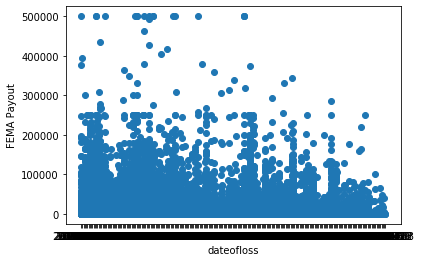

In [50]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019.dateofloss,FEMA_2019.amountpaidonbuildingclaim)
plt.xlabel('dateofloss')
plt.ylabel('FEMA Payout')
plt.show()

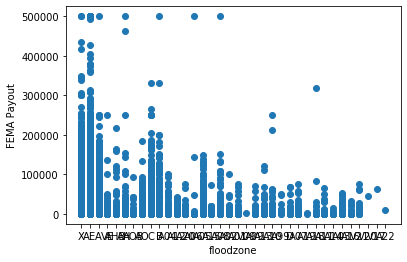

In [51]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019.floodzone,FEMA_2019.amountpaidonbuildingclaim)
plt.xlabel('floodzone')
plt.ylabel('FEMA Payout')
plt.show()

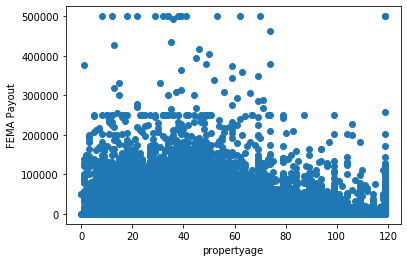

In [52]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019.propertyage,FEMA_2019.amountpaidonbuildingclaim)
plt.xlabel('propertyage')
plt.ylabel('FEMA Payout')
plt.show()

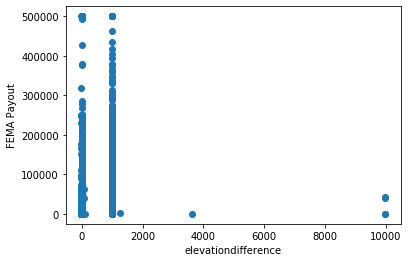

In [53]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019.elevationdifference,FEMA_2019.amountpaidonbuildingclaim)
plt.xlabel('elevationdifference')
plt.ylabel('FEMA Payout')
plt.show()

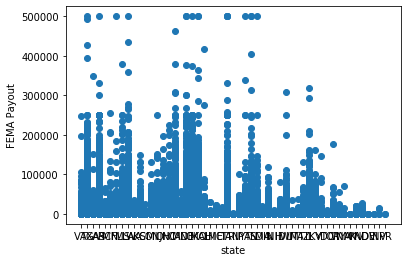

In [66]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019.state,FEMA_2019.amountpaidonbuildingclaim)
plt.xlabel('state')
plt.ylabel('FEMA Payout')
plt.show()

In [71]:
#FEMA_2019.state[0] # + ', ' + FEMA_2019.reportedcity[0]

In [62]:
amtpaid = FEMA_2019.amountpaidonbuildingclaim

In [64]:
NoPayout = FEMA_2019.apply(lambda x: True if x['amountpaidonbuildingclaim'] <= 0 else False , axis=1)

NoPayoutRows = len(NoPayout[NoPayout == True].index)

NoPayoutRows

5211

In [65]:
FEMA_2019_notpaid = FEMA_2019.copy()

indexNames = FEMA_2019_notpaid[FEMA_2019_notpaid['amountpaidonbuildingclaim'] > 0 ].index
 
# Delete these row indexes from dataFrame
FEMA_2019_notpaid.drop(indexNames , inplace=True)

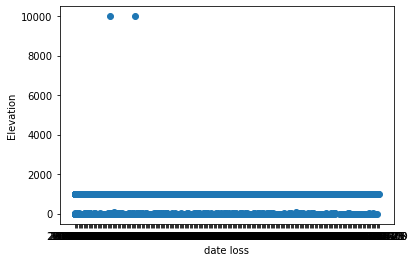

In [73]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019_notpaid.dateofloss,FEMA_2019_notpaid.elevationdifference)
plt.xlabel('date loss')
plt.ylabel('Elevation')
plt.show()

In [74]:
FEMA_2019_paid = FEMA_2019.copy()

indexNames = FEMA_2019_paid[FEMA_2019_paid['amountpaidonbuildingclaim'] < 0 ].index
 
# Delete these row indexes from dataFrame
FEMA_2019_paid.drop(indexNames , inplace=True)

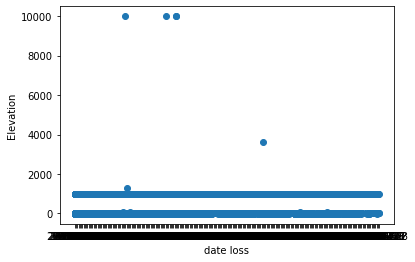

In [75]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_2019_paid.dateofloss,FEMA_2019_paid.elevationdifference)
plt.xlabel('date loss')
plt.ylabel('Elevation')
plt.show()

In [76]:
FEMA_2019_notpaid.head(50)

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode,lossyear,lossmonth,lossday,builtyear,builtmonth,builtlossday,propertyage
1283,BEDFORD,2019-05-18,999.0,X,32.9,-97.1,1.0,1.0,1983-01-01,0.0,TX,76021,2019.0,5.0,18.0,1983.0,1.0,1.0,36.0
1534,ATLANTA,2019-08-01,999.0,X,33.9,-84.4,2.0,1.0,1965-01-01,0.0,GA,30327,2019.0,8.0,1.0,1965.0,1.0,1.0,54.0
2033,COLUMBIA,2019-01-21,999.0,X,34.1,-81.1,3.0,1.0,1970-01-01,0.0,SC,29210,2019.0,1.0,21.0,1970.0,1.0,1.0,49.0
3305,PORT ST LUCIE,2019-07-08,999.0,X,27.3,-80.4,1.0,1.0,2005-04-01,0.0,FL,34986,2019.0,7.0,8.0,2005.0,4.0,1.0,14.0
3751,HOUSTON,2019-05-09,999.0,X,29.7,-95.5,1.0,1.0,1970-01-01,0.0,TX,77096,2019.0,5.0,9.0,1970.0,1.0,1.0,49.0
3804,OCEAN SPRINGS,2019-07-14,3.0,AE,30.4,-88.8,1.0,1.0,1979-01-01,0.0,MS,39564,2019.0,7.0,14.0,1979.0,1.0,1.0,40.0
4733,UNIVERSITY PLAC,2019-02-08,999.0,A,47.2,-122.6,3.0,1.0,1928-01-01,0.0,WA,98466,2019.0,2.0,8.0,1928.0,1.0,1.0,91.0
5066,PUEBLO,2019-03-14,999.0,X,38.3,-104.5,2.0,1.0,2015-01-01,0.0,CO,81006,2019.0,3.0,14.0,2015.0,1.0,1.0,4.0
5307,MINNEAPOLIS,2019-05-09,999.0,X,45.0,-93.3,2.0,1.0,1963-01-01,0.0,MN,55422,2019.0,5.0,9.0,1963.0,1.0,1.0,56.0
6068,SOUTHFIELD,2019-07-09,999.0,X,42.5,-83.3,2.0,1.0,1986-01-01,0.0,MI,48034,2019.0,7.0,9.0,1986.0,1.0,1.0,33.0


In [78]:
FEMA_2019['location'] = FEMA_2019['reportedcity'].str.cat(FEMA_2019['state'],sep=", ")

In [85]:
FEMA_2019['recievedpayment'] = FEMA_2019['amountpaidonbuildingclaim'].apply(lambda x: 'True' if x > 0 else 'False')

In [86]:
FEMA_2019

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,...,reportedzipcode,lossyear,lossmonth,lossday,builtyear,builtmonth,builtlossday,propertyage,location,recievedpayment
1131,MC LEAN,2019-07-08,999.0,X,38.9,-77.1,2.0,1.0,1960-01-01,48445.08,...,22101,2019.0,7.0,8.0,1960.0,1.0,1.0,59.0,"MC LEAN, VA",True
1283,BEDFORD,2019-05-18,999.0,X,32.9,-97.1,1.0,1.0,1983-01-01,0.00,...,76021,2019.0,5.0,18.0,1983.0,1.0,1.0,36.0,"BEDFORD, TX",False
1534,ATLANTA,2019-08-01,999.0,X,33.9,-84.4,2.0,1.0,1965-01-01,0.00,...,30327,2019.0,8.0,1.0,1965.0,1.0,1.0,54.0,"ATLANTA, GA",False
1590,FORT SMITH,2019-05-28,999.0,X,35.4,-94.3,2.0,1.0,1977-07-01,182199.09,...,72903,2019.0,5.0,28.0,1977.0,7.0,1.0,42.0,"FORT SMITH, AR",True
2033,COLUMBIA,2019-01-21,999.0,X,34.1,-81.1,3.0,1.0,1970-01-01,0.00,...,29210,2019.0,1.0,21.0,1970.0,1.0,1.0,49.0,"COLUMBIA, SC",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986011,STILLWATER,2019-05-21,1.0,AE,36.1,-97.1,1.0,1.0,1965-10-05,93848.99,...,74074,2019.0,5.0,21.0,1965.0,10.0,5.0,54.0,"STILLWATER, OK",True
1986199,DORAVILLE,2019-04-19,999.0,AE,33.9,-84.2,2.0,1.0,1959-01-01,4212.50,...,30340,2019.0,4.0,19.0,1959.0,1.0,1.0,60.0,"DORAVILLE, GA",True
1986203,STONE MOUNTAIN,2019-06-11,999.0,AE,33.8,-84.2,3.0,1.0,1970-05-01,6709.34,...,30083,2019.0,6.0,11.0,1970.0,5.0,1.0,49.0,"STONE MOUNTAIN, GA",True
1986207,RINCON,2019-06-12,999.0,X,32.3,-81.2,1.0,1.0,1997-08-01,637.93,...,31326,2019.0,6.0,12.0,1997.0,8.0,1.0,22.0,"RINCON, GA",True


In [97]:
df = FEMA_2019.copy()
df = df.drop("reportedzipcode", axis=1)
df = df.drop("location", axis=1)
#df = df.drop("floodzone", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
df = df.drop("elevationdifference", axis=1)
#df = df.drop("latitude", axis=1)
#df = df.drop("longitude", axis=1)
#df = df.drop("lossday", axis=1)
#df = df.drop("builtlossday", axis=1)
#df = df.drop("propertyage", axis=1)
FEMA_encoded = pd.get_dummies(df, columns=["state", "floodzone", "occupancytype", "numberoffloorsintheinsuredbuilding"])#, "recievedpayment"])

y =FEMA_encoded.copy()
X = FEMA_encoded.copy()
X = X.drop("recievedpayment", axis=1)

In [99]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,
#                                                   y['amountpaidonbuildingclaim'],
 #                                                  random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['recievedpayment'],
                                                   random_state=1)

In [100]:
# Train the Classifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

#random forest, neural networks with linear regression
#model = LinearRegression() 
#model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
classifier.fit(X_train, y_train)

C:\Users\patel\Anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1027694,True,True
1885398,True,True
76171,True,True
1967725,False,False
257678,True,True
...,...,...
1839499,True,True
1089889,True,True
178363,True,True
162944,True,True


In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [91]:
score = model.score(X_test, y_test)
score

-4463126560686.869

In [93]:
X_test

,latitude,longitude,lossyear,lossmonth,lossday,builtyear,builtmonth,builtlossday,propertyage,state_AK,...,occupancytype_4.0,occupancytype_6.0,numberoffloorsintheinsuredbuilding_1.0,numberoffloorsintheinsuredbuilding_2.0,numberoffloorsintheinsuredbuilding_3.0,numberoffloorsintheinsuredbuilding_4.0,numberoffloorsintheinsuredbuilding_5.0,numberoffloorsintheinsuredbuilding_6.0,recievedpayment_False,recievedpayment_True
1027694,26.2,-97.8,2019.0,6.0,24.0,1998.0,7.0,1.0,21.0,0,...,0,0,1,0,0,0,0,0,0,1
1885398,44.5,-88.0,2019.0,3.0,14.0,1972.0,6.0,1.0,47.0,0,...,0,0,0,1,0,0,0,0,0,1
76171,38.5,-123.1,2019.0,2.0,27.0,1977.0,1.0,1.0,42.0,0,...,0,0,0,1,0,0,0,0,0,1
1967725,30.8,-91.6,2019.0,8.0,19.0,2011.0,8.0,21.0,8.0,0,...,0,0,1,0,0,0,0,0,1,0
257678,30.0,-90.1,2019.0,5.0,12.0,1940.0,2.0,1.0,79.0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839499,29.5,-95.9,2019.0,5.0,7.0,1977.0,1.0,1.0,42.0,0,...,0,0,1,0,0,0,0,0,0,1
1089889,34.6,-90.6,2019.0,2.0,28.0,1983.0,1.0,1.0,36.0,0,...,0,0,0,0,1,0,0,0,0,1
178363,36.9,-94.9,2019.0,5.0,21.0,1971.0,7.0,1.0,48.0,0,...,0,0,0,1,0,0,0,0,0,1
162944,41.5,-90.6,2019.0,4.0,30.0,1958.0,1.0,1.0,61.0,0,...,1,0,1,0,0,0,0,0,0,1


In [94]:
X_train

,latitude,longitude,lossyear,lossmonth,lossday,builtyear,builtmonth,builtlossday,propertyage,state_AK,...,occupancytype_4.0,occupancytype_6.0,numberoffloorsintheinsuredbuilding_1.0,numberoffloorsintheinsuredbuilding_2.0,numberoffloorsintheinsuredbuilding_3.0,numberoffloorsintheinsuredbuilding_4.0,numberoffloorsintheinsuredbuilding_5.0,numberoffloorsintheinsuredbuilding_6.0,recievedpayment_False,recievedpayment_True
322691,26.2,-97.8,2019.0,6.0,24.0,1999.0,9.0,9.0,20.0,0,...,0,1,0,1,0,0,0,0,0,1
156983,32.6,-93.7,2019.0,4.0,15.0,2008.0,1.0,1.0,11.0,0,...,0,1,1,0,0,0,0,0,0,1
625664,41.3,-96.3,2019.0,3.0,14.0,1920.0,5.0,1.0,99.0,0,...,0,0,0,0,1,0,0,0,0,1
1099837,26.1,-98.0,2019.0,6.0,24.0,1994.0,5.0,31.0,25.0,0,...,0,0,1,0,0,0,0,0,0,1
1883206,29.8,-91.2,2019.0,5.0,1.0,1986.0,1.0,1.0,33.0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981258,38.6,-90.3,2019.0,6.0,1.0,1964.0,1.0,1.0,55.0,0,...,0,0,0,1,0,0,0,0,0,1
1937599,30.1,-95.2,2019.0,5.0,7.0,1984.0,6.0,1.0,35.0,0,...,0,0,0,1,0,0,0,0,0,1
310063,29.7,-95.6,2019.0,5.0,7.0,1969.0,1.0,1.0,50.0,0,...,0,0,1,0,0,0,0,0,0,1
1061334,26.2,-97.7,2019.0,6.0,25.0,1968.0,1.0,1.0,51.0,0,...,0,0,1,0,0,0,0,0,0,1
